# Plot GAtor Iteration vs Global Minimum

In [6]:
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
from __future__ import division
import numpy as np

# Parses Gator energy hierarchy
def get_data(file):
    data = []
    for line in open(file).readlines():
        if "#" in line:
            pass
        else:
            element = line.split(" ")
            element = [x for x in element if x]
            data.append(element)    
    return data

# Returns iteration of each structure added
def return_sorted_iteration_list(data, IP_size):
    iteration_list = []
    for line in data:
        if line[2] != 'init_pool':
            iteration_list.append(int(line[1])-IP_size)
    iteration_list.sort()
    return iteration_list

# Returns the energy of each structure, sorted by
# when it was added to the common population
def return_energy_vs_iteration(data):
    energy_data = []
    for line in data:
        if line[2] != 'init_pool':
            energy_data.append([line[1], line[4]])
    energy_data.sort(key=lambda x: x[0])
    return energy_data

def return_energy_sorted_by_iteration(data):
    just_energies = []
    energy_data = return_energy_vs_iteration(data)
    energy_data.sort(key=lambda x: x[0])
    for i in range(len(energy_data)):
            just_energies.append([int(energy_data[i][0]),float(energy_data[i][1])])
    just_energies.sort(key=lambda x: x[0])
    energy=[]
    for i in range(len(energy_data)):
            energy.append(just_energies[i][1])
    return energy

# Returns the minimum energy in the population per iteration
def return_min_vs_iteration_scaled(energies, gm, nmpc, kj=False):
    y_min = []
    total = []
    for en in energies:
        total.append(float(en))
        if not kj:
            y_min.append((min(total)-gm)/nmpc)
        else:
            y_min.append(((min(total)-gm)/nmpc)*96)
    return y_min

# Returns the average energy in the population per iteration
def return_mean_vs_iteration_scaled(energies,gm,nmpc,unit=False):
    y_min = []
    total = []
    for en in energies:
        total.append(float(en))
        if not unit:
            y_min.append((np.average(total)-gm)/nmpc)
        else:
            y_min.append(((np.average(total)-gm)/nmpc)*96)
    return y_min

In [7]:
tourn50 = get_data("/Users/farren/Desktop/my-notebook/TCS3_Diverse_Energy_Hierarchies/tourn_50cross_hierarchy.txt")
tourn50_clust = get_data("TCS3_Diverse_Energy_Hierarchies/tourn20_50cross_clustlat_hierarchy.txt")

# Get data to plot, relative to the global minimum energy gm, the numper of molecules
# per unit cell and either eV/molecule or kj/mol energy units 

# Parameters from the run
IP_size = 99 #initial pool size
gm = -186947.499 # eV PBE+TS global minimum of all runs
nmpc = 4 # number of molecules per unit cell
unit = False # If false energy units are potted in Ev/molecule, otherwise kJ/mol
 

# GA runwithout clustering
tourn50_i = return_sorted_iteration_list(tourn50, IP_size)         
tourn50_en = return_energy_sorted_by_iteration(tourn50)
tourn50_min = return_min_vs_iteration_scaled(tourn50_en, gm, nmpc, unit)
                         
# GA run with clustering 
tourn50_clust_i = return_sorted_iteration_list(tourn50_clust, IP_size)
tourn50_clust_en = return_energy_sorted_by_iteration(tourn50_clust)
tourn50_clust_min = return_min_vs_iteration_scaled(tourn50_clust_en, gm, nmpc, unit)                                                            

# Plots

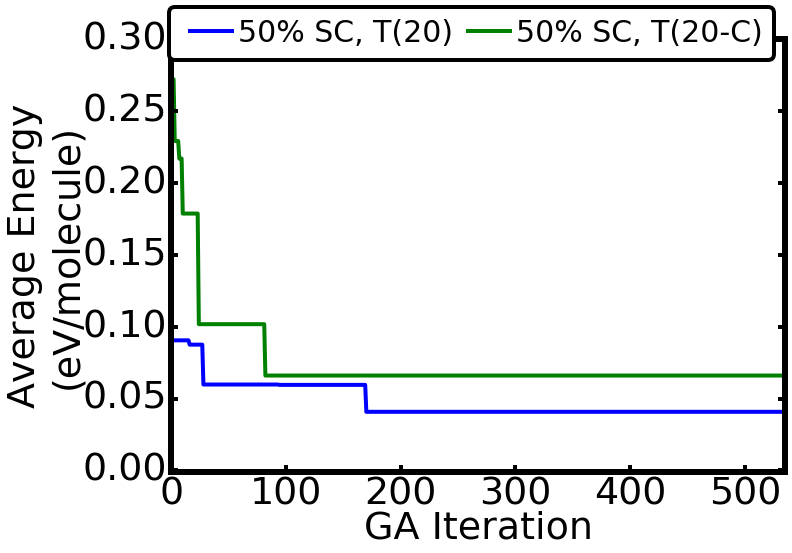

In [8]:
%matplotlib inline
from textwrap import wrap

# Create figure
f = plt.figure(figsize=(11,7.75))
ax = plt.subplot()
ax.ticklabel_format(useOffset=False,linewidth=3)
wid = 4

# Plot data gathered in previous section
ax.plot(tourn50_i, tourn50_min,'blue',linewidth=wid, label='50% SC, T(20)')
ax.plot(tourn50_clust_i, tourn50_clust_min,'green',linewidth=wid,label='50% SC, T(20-C)')

#Axes Limits
ax.set_xlim([0,535]) #iteration
ax.set_ylim([-.001,0.3]) #eV

#Axes Labels
size = 38
ax.set_xlabel('GA Iteration',fontsize=size,labelpad=-2)
ax.set_ylabel("\n".join(wrap("Average Energy (eV/molecule)", 15)),fontsize=size,labelpad=-2)

#Title
size=26

# Border Thickness
width = 6
ax.spines['top'].set_linewidth(width)
ax.spines['right'].set_linewidth(width)
ax.spines['bottom'].set_linewidth(width)
ax.spines['left'].set_linewidth(width)

#Axes Font Size
ax.tick_params(axis='both', which='major', labelsize=38)
ax.tick_params(which='both', width=4, length=7)

#Legend
l = ax.legend(bbox_to_anchor = [1.007, 1.11],shadow=False,ncol=2,fontsize = 30,fancybox=True,handletextpad=-.1,columnspacing=.2)
l.get_frame().set_linewidth(4)

#optionally save figure to computer
#f.savefig('TCS3_average.png') 

# Output plot to screeen
plt.show()